# **Customer Churn -  pet project by Husan Ismoilov**

Customer churn helps you predict the customers' mood whether they are going to stay or not. If the company can predict a customer who is about to use no longer the product, then the company can do something about it.

We'll see the example of the online e-commerce shop.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # for normalization
from sklearn.model_selection import train_test_split

#we're gonna use some algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

Let's read and understand the data

In [4]:
url="https://github.com/Enthusiasticguy/Customer-churn/blob/main/E-Commerce-Dataset.xlsx?raw=true"
# there are some tables. we're gonna choose E Comm
df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
df.shape

(5630, 20)

we got 20 columns. let's see what those mean

In [8]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

we can see here that we got some missing values. we're gonna choose what to decide then

***let's see how many customers are about to leave***

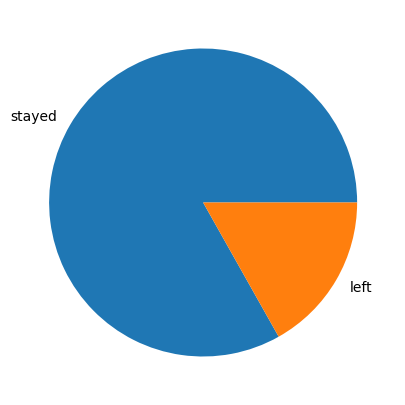

In [13]:
churn_rate = df['Churn'].value_counts()/len(df)*100

plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['stayed','left'])
plt.show()

Let's see some graphs of numerical columns like `Tenure`, `OrderCount`, `CashBackAmount` and analyze them

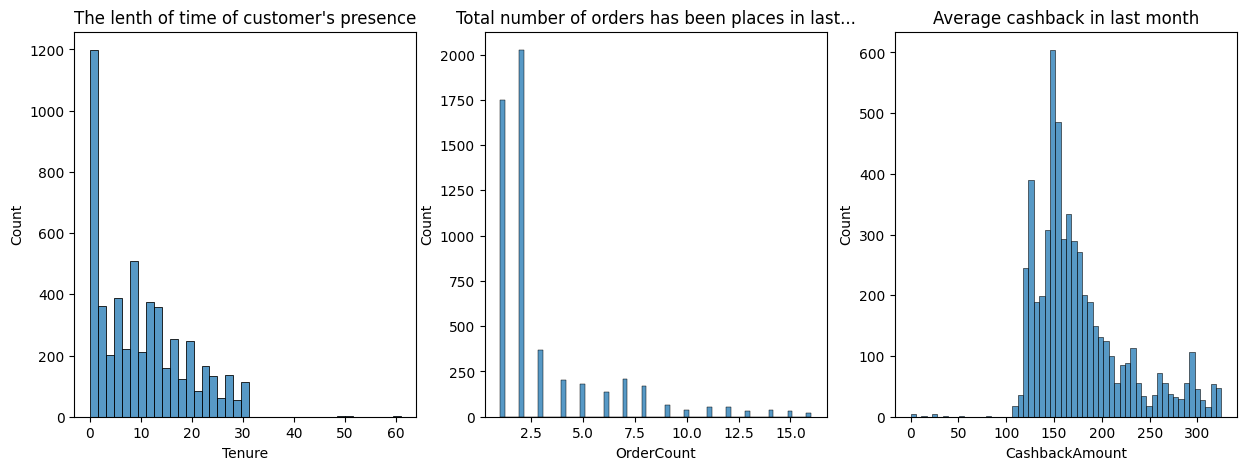

In [14]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("The lenth of time of customer's presence")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Total number of orders has been places in last...")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Average cashback in last month")

plt.show()

***Let's analalyze categorical columns ***

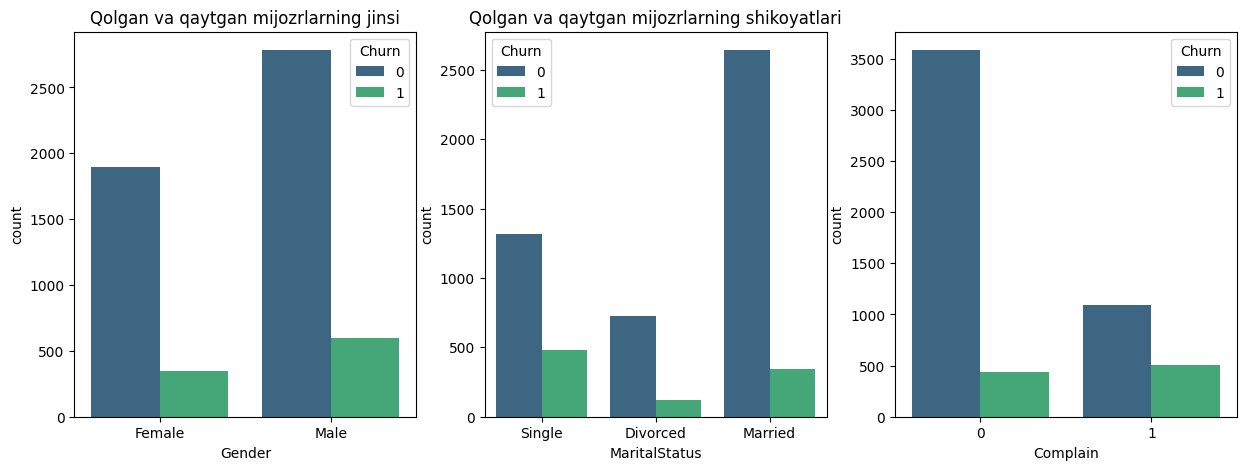

In [19]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Qolgan va qaytgan mijozrlarning shikoyatlari")

plt.show()

# 1 means left, 0 means stayed in Churn label

# Let's see the correlation beteen Churn label and the rest of columns

In [22]:
df_numeric = df.drop(columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender', 'PreferedOrderCat', 'MaritalStatus'])
df_numeric.corrwith(df['Churn']).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154118
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.076630
NumberOfAddress,0.043931


In [23]:
#Total number of Nans
print(f"Total number of Nans: {df.isnull().sum().sum()}")
#Total number of missing rows
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Total number of missing rows: {missing_rows}")
#ratio of that
print(f"The ration %: {np.round(missing_rows/len(df)*100)}%")

Total number of Nans: 1856
Total number of missing rows: 1856
The ration %: 33.0%


*As you can see, that's a lot. So we have to do another way.
\Let's drop some columns that has little correlation with Churn and take the others and categorical columns*

In [24]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [27]:
#Total number of Nans
print(f"Total number of Nans: {data.isnull().sum().sum()}")
#Total number of missing rows
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Total number of missing rows: {missing_rows}")
#ratio of that
print(f"The ration %: {np.round(missing_rows/len(data)*100)}%")

Total number of Nans: 571
Total number of missing rows: 571
The ration %: 10.0%


**This is much better. We can drop the 10 percent of missing rows**

In [28]:
data = data.dropna()
data.shape

(5059, 7)

# Preprocessing

we're gonna make categorical values into categorical values into numerical or boolean

In [30]:
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,False,False,True,True,False
3,1,0.0,0,3.0,134.07,False,False,True,False,True
4,1,0.0,0,3.0,129.60,False,False,True,False,True
5,1,0.0,1,7.0,139.19,False,False,True,True,False
8,1,13.0,1,2.0,126.83,True,False,False,False,True


In [31]:
X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

In [33]:
#scaling all the data except label Y (Churn)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 78)

# **ML**

# **Logistic Regression**

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       849
           1       0.63      0.27      0.38       163

    accuracy                           0.86      1012
   macro avg       0.75      0.62      0.65      1012
weighted avg       0.83      0.86      0.83      1012

Accuracy Score:  0.8567193675889329


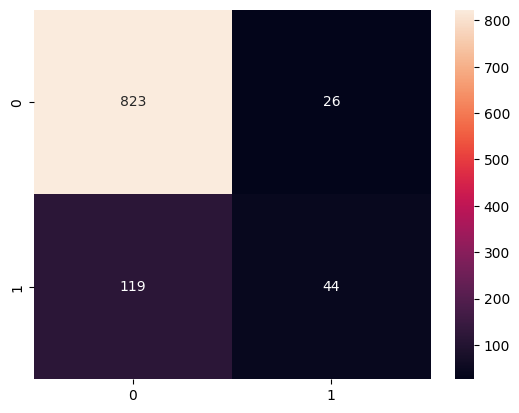

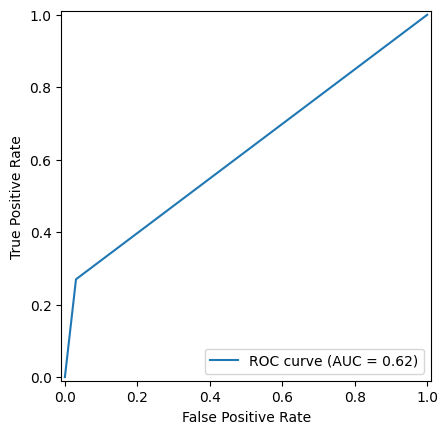

In [48]:
#Creating the model
L_R_model = LogisticRegression()
L_R_model.fit(X_train,Y_train)

#Evaluating the model

## Classification report
y_predicted = L_R_model.predict(X_test)
print(metrics.classification_report(Y_test,y_predicted))
print("Accuracy Score: ",metrics.accuracy_score(Y_test,y_predicted))

## Confusion matrix
conf_mat = metrics.confusion_matrix(Y_test,y_predicted)
sns.heatmap(data = conf_mat, annot = True, fmt = "g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = "ROC curve")
display.plot()
plt.show()

# **Support Vector Machines (SVC)**

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       849
           1       0.61      0.24      0.34       163

    accuracy                           0.85      1012
   macro avg       0.74      0.60      0.63      1012
weighted avg       0.83      0.85      0.82      1012

Accuracy Score:  0.8527667984189723


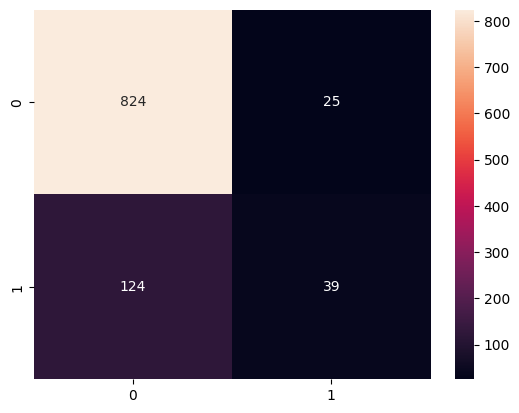

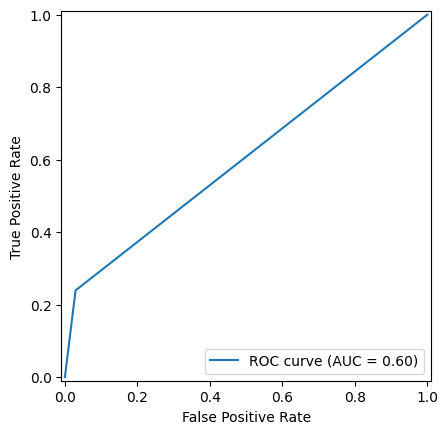

In [52]:
#Creating the model
svm_model = SVC()
svm_model.fit(X_train, Y_train)

#Evaluating the model

## Classifaction report
y_predicted = svm_model.predict(X_test)
print(metrics.classification_report(Y_test, y_predicted))
print("Accuracy Score: ",metrics.accuracy_score(Y_test,y_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, y_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

##ROC curve
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# **Decision Tree**

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       849
           1       0.83      0.91      0.87       163

    accuracy                           0.96      1012
   macro avg       0.91      0.94      0.92      1012
weighted avg       0.96      0.96      0.96      1012

Accuracy score: 0.9555335968379447


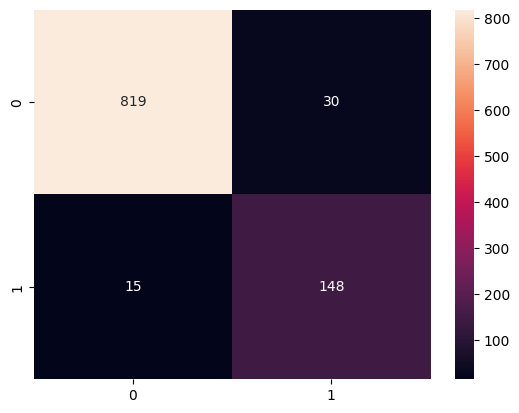

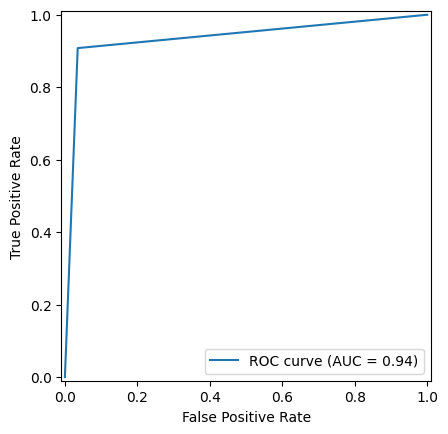

In [55]:
# Creating the model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

# Modelni baholaymiz
y_predicted = tree_model.predict(X_test)
print(metrics.classification_report(Y_test, y_predicted))
print("Accuracy score:", metrics.accuracy_score(Y_test,y_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, y_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Let's draw the tree itself

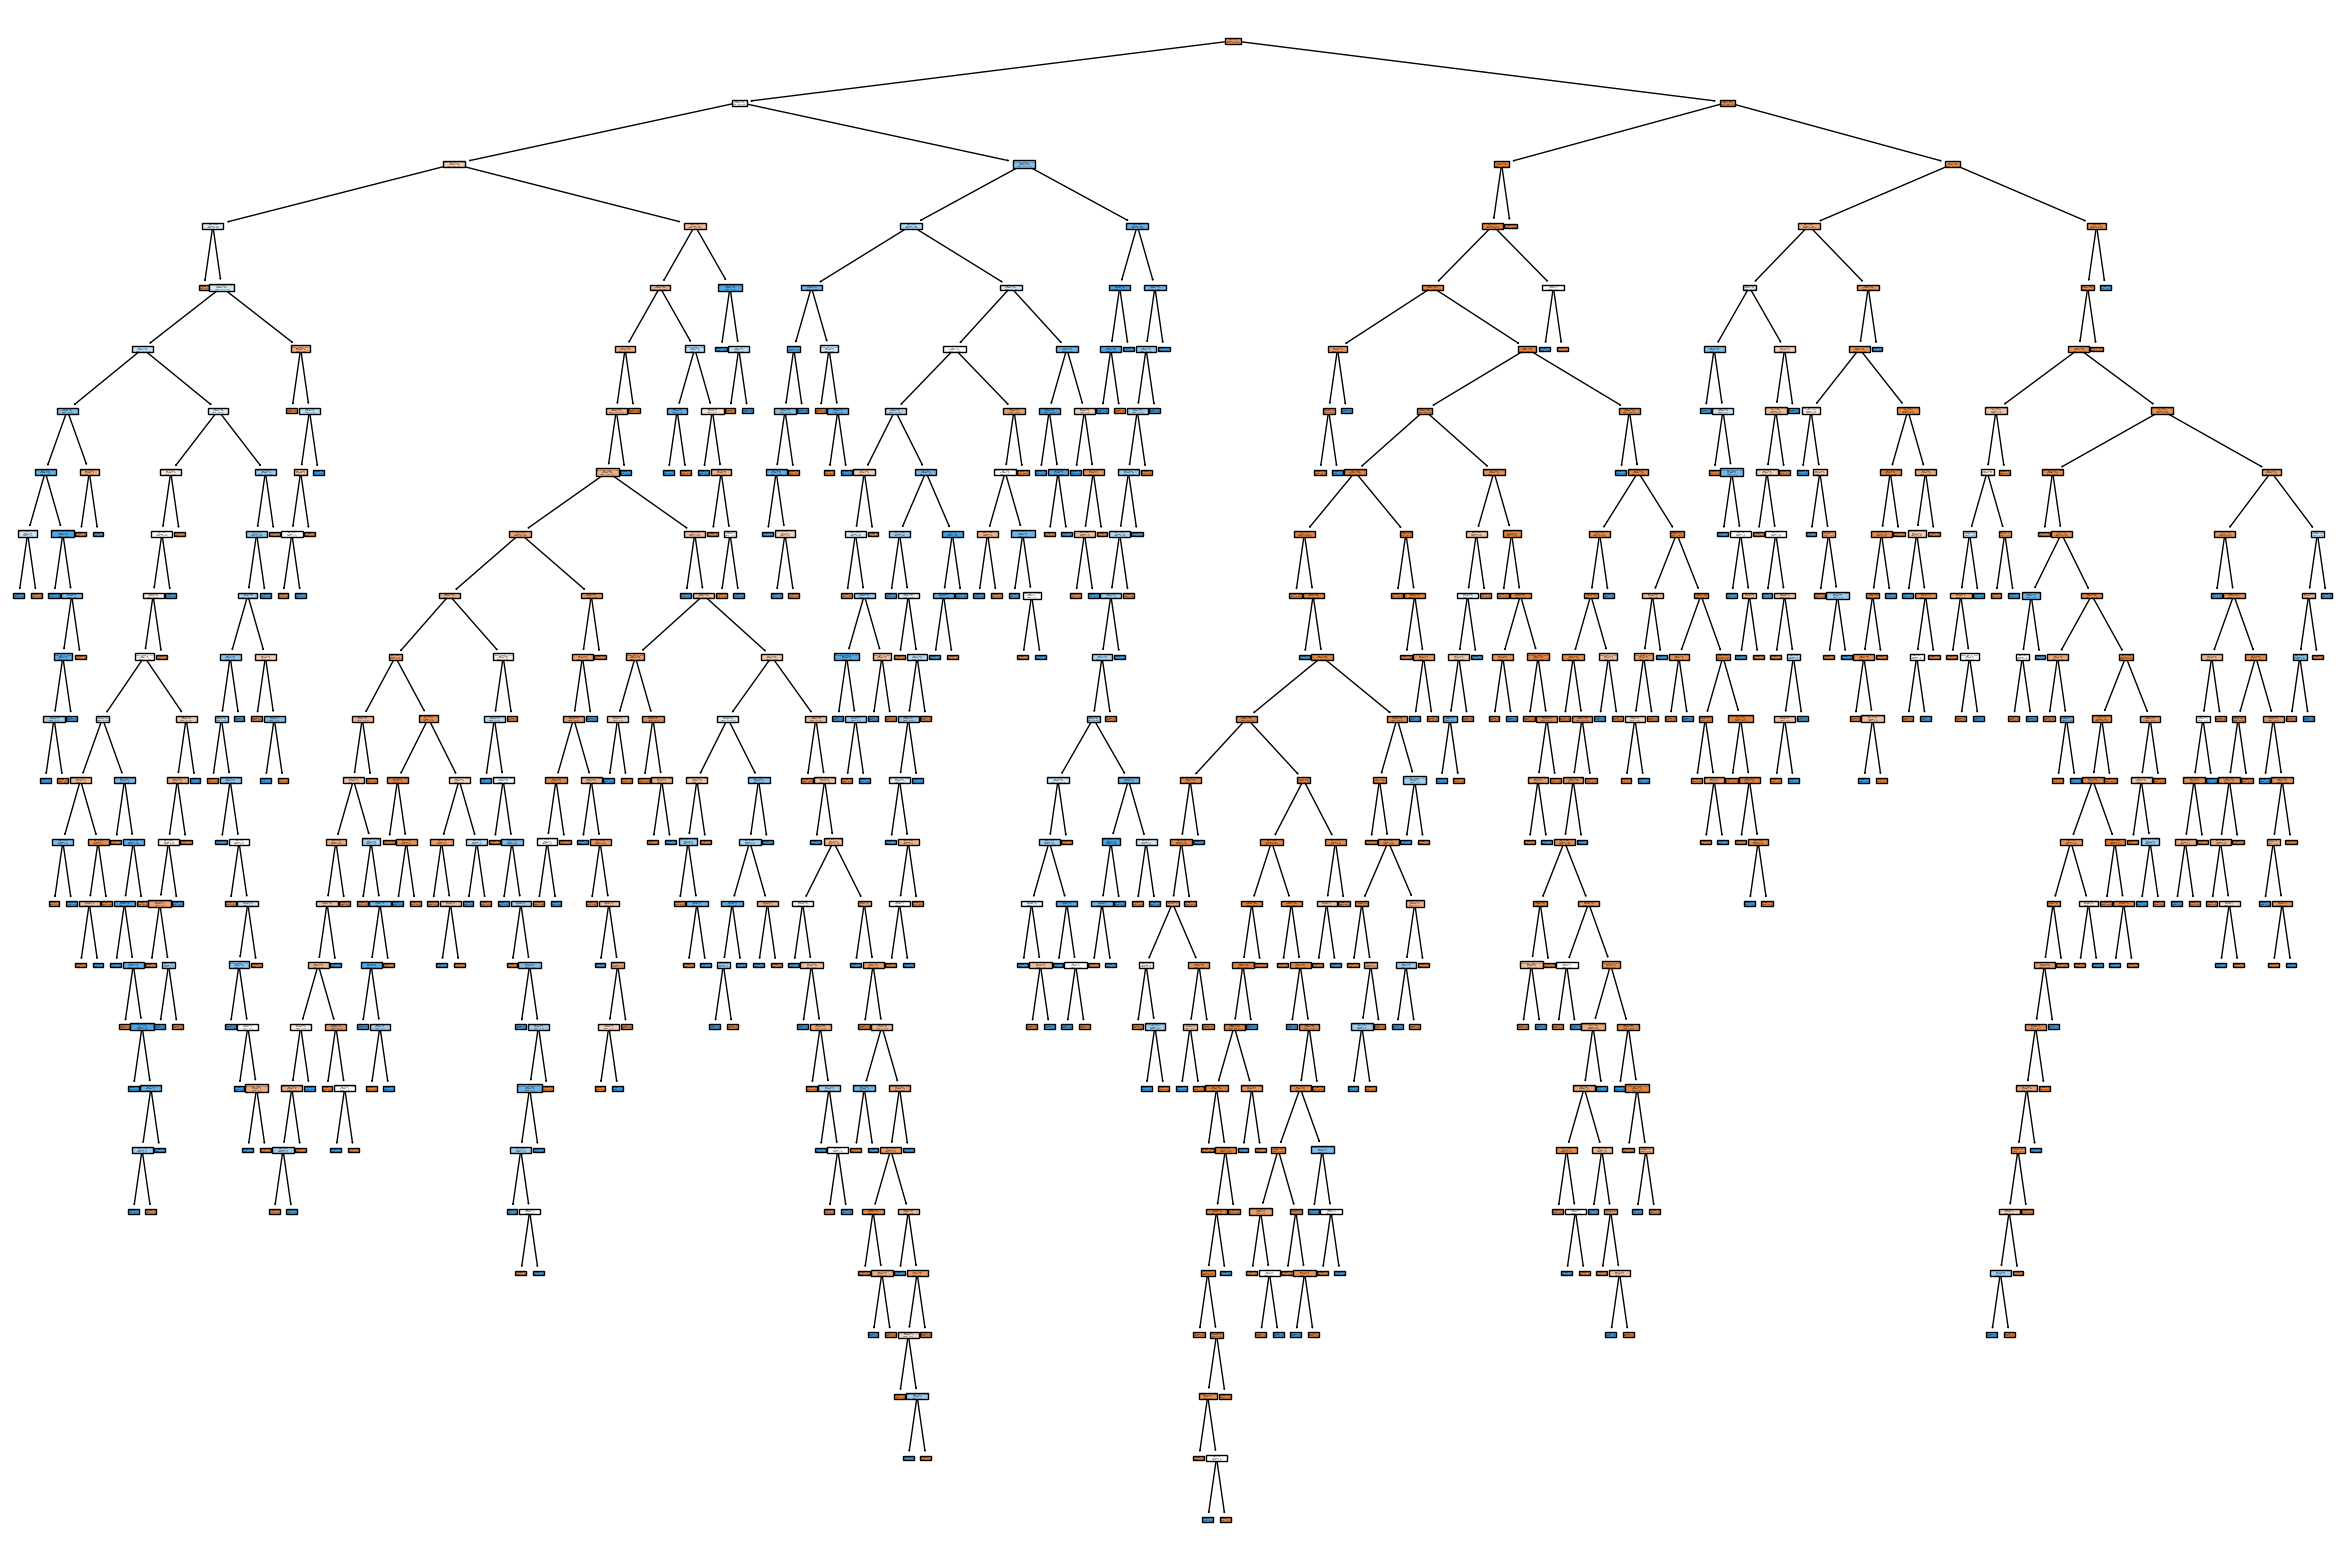

In [56]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

# **Random Forest**

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       849
           1       0.76      0.71      0.73       163

    accuracy                           0.92      1012
   macro avg       0.85      0.83      0.84      1012
weighted avg       0.92      0.92      0.92      1012

Model aniqligi: 0.9169960474308301


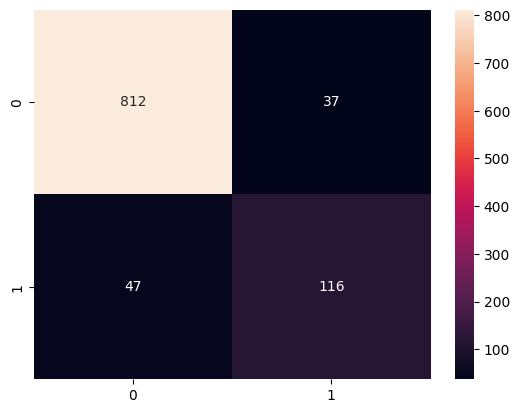

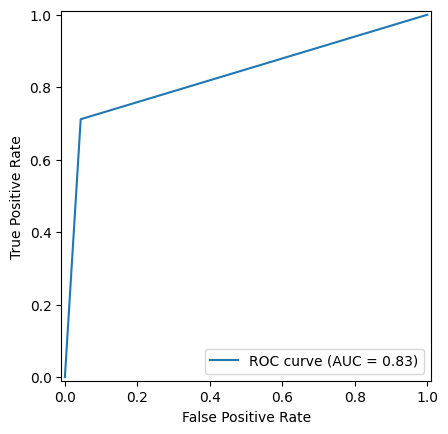

In [57]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, Y_train)

# Modelni baholaymiz
y_predicted = RF_model.predict(X_test)
print(metrics.classification_report(Y_test, y_predicted))
print("Model aniqligi:", metrics.accuracy_score(Y_test,y_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, y_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# **XGBoost**

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       849
           1       0.83      0.72      0.77       163

    accuracy                           0.93      1012
   macro avg       0.89      0.84      0.86      1012
weighted avg       0.93      0.93      0.93      1012

Model aniqligi: 0.9308300395256917


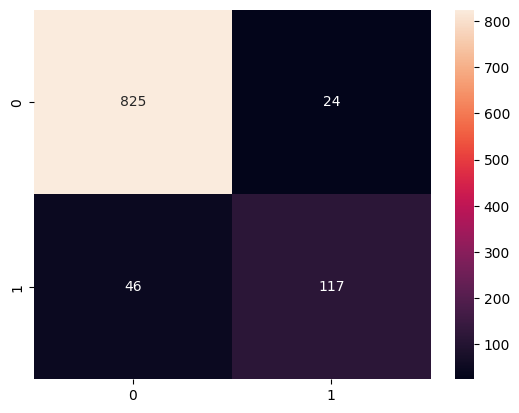

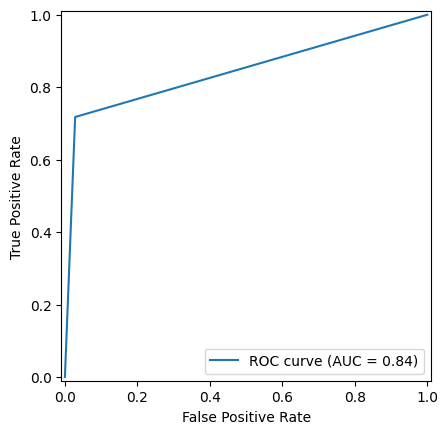

In [58]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)

# Modelni baholaymiz
y_predicted = xgb_model.predict(X_test)
print(metrics.classification_report(Y_test, y_predicted))
print("Model aniqligi:", metrics.accuracy_score(Y_test,y_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, y_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# **THE best model is Decision Tree with 95% accuracy and 0.94 AUC**